# __III__ `                                         by Luk Peeters                          ` 

In [ ]:
pip install ipympl

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [17]:
# Chloride deposition grid
fname = '03_cl_Beta_deposition_final.txt'

a01_numpy_array = np.loadtxt(fname,skiprows=6)                 # numpy array, skip metadata
a02_dictionary = {}

with open(fname) as f:
    while len(a02_dictionary)<6:
        tmp = f.readline().split()                     # name _______ #  value ________
        a02_dictionary[tmp[0]] = float(tmp[1])         # string to float

In [16]:
a02_dictionary

{'ncols': 816.0,
 'nrows': 680.0,
 'xllcorner': 112.875000018,
 'yllcorner': -43.924999998,
 'cellsize': 0.050000001,
 'NODATA_value': -9999.0}

Text(0.5, 1.0, 'Chloride deposition')

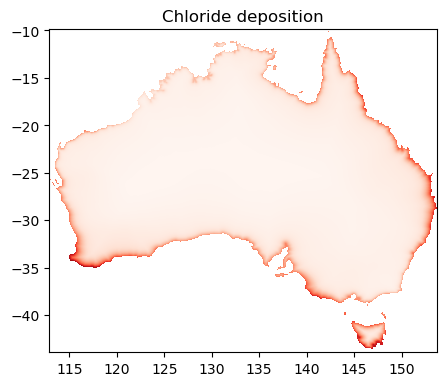

In [22]:
a01_numpy_array[a01_numpy_array<(a02_dictionary['NODATA_value']+1)] = np.nan

fig,ax = plt.subplots()
fig.set_size_inches(5,5)
p = ax.imshow(a01_numpy_array,
          origin = 'upper',
          cmap = 'Reds',
          extent = (a02_dictionary['xllcorner'],  a02_dictionary['xllcorner']+(a02_dictionary['ncols']*a02_dictionary['cellsize']),
                   a02_dictionary['yllcorner'],   a02_dictionary['yllcorner']+(a02_dictionary['nrows']*a02_dictionary['cellsize'])))
# cbar = plt.colorbar(p)  cbar.set_label('kg/ha/year')
ax.set_title('Chloride deposition')

# __Add__ __info__ __to__ __map__

In [29]:
fname = '01_CSH_SA.xlsx'
sheet = 'Data'
chem = pd.read_excel(fname,sheet)

Number of records without missing values = 0


In [32]:
# chem 
# chem.columns
nsample = len(chem)
ncomplete = len(chem.dropna())                                                 # DROP ___ rows with  NaN
# print('Number of records without missing values = {}'.format(ncomplete))

In [33]:
chem.dropna(axis=0,how='all',subset=chem.columns[7::],inplace=True)
print('Number of records removed = {}'.format(nsample-len(chem)))

Number of records removed = 0


In [34]:
ax.set_xlim(chem['Long'].min(),chem['Long'].max())             # zoom in to SA data
ax.set_ylim(chem['Lat'].min(),chem['Lat'].max())

s = ax.scatter(chem['Long'],chem['Lat'],.2,np.log10(chem['Cl_mgL']),cmap='viridis')    # scatter  log10 Cl
cbars = plt.colorbar(s)
cbars.set_label('Log10 Cl (mg/L)')

C:\Users\gross.DESKTOP-AIRQM2M\AppData\Local\Temp\ipykernel_8592\3559417591.py:6: UserWarning: Adding colorbar to a different Figure <Figure size 500x500 with 3 Axes> than <Figure size 640x480 with 0 Axes> which fig.colorbar is called on.
  cbars = plt.colorbar(s)


<Figure size 640x480 with 0 Axes>

In [35]:
xmin = cl_depo_meta['xllcorner']
xmax = cl_depo_meta['xllcorner']+cl_depo_meta['cellsize']*cl_depo_meta['ncols']
ymin = cl_depo_meta['yllcorner']
ymax = cl_depo_meta['yllcorner']+cl_depo_meta['cellsize']*cl_depo_meta['nrows']
cell = cl_depo_meta['cellsize']

yind = (np.floor((chem['Long'] - xmin)/cell)).astype('int')
xind = (cl_depo_meta['nrows']-np.floor((chem['Lat'] - ymin)/cell)).astype('int')       # index
chem['Cl_depo'] = cl_depo[xind,yind]

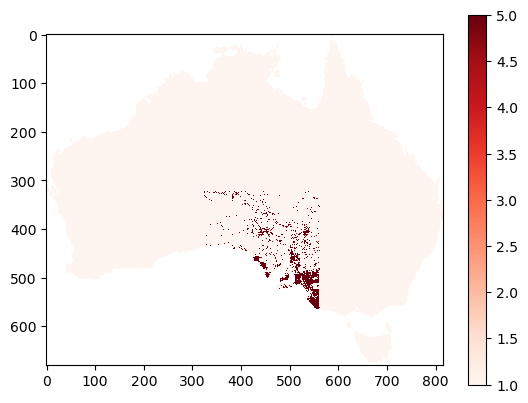

In [36]:
# create an empty array with same dimensions as cl_depo
a = np.zeros_like(cl_depo)*np.nan
# give all cells > 0 the value 1
a[cl_depo>0] = 1
# give all cells with a sample the value 5
a[xind,yind] = 5
# quick and dirty visualisation
plt.figure()
# use no interpolation to avoid pixels being affected by neighbours
plt.imshow(a,interpolation='none',cmap='Reds')
plt.colorbar()

# Some more, ....